### K-Means Clustering to Create Park Typologies

#### Authors: Eric Englin, Sophie Abo, Mac Lang
#### Date: 7/14/23


**Description**
This code uses a park-level dataset of 2021 recreation visits, size, settings (urban, rural, suburban), and visitation patterns (sporadic, seasonal, sustained). The code uses k-means clustering to create park categories that can be interpreted for typologies. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
df = pd.read_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Dataset Alt 23.12.07.xlsx")

In [3]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,Setting,2012,2016,2019,2022,Jan-19,Feb-19,...,Percent of Road Paved,Total Parking Area (Acres),Miles of Road/Acre,Acre of Parking/Acre,visitation patterns,Access Type,Recent Trans Data Collection Study,Hrly VUStats,FOTSC park,remove
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,rural,169515,252495,238226,265707,1939,6534,...,100.000000,1.503191,0.002441,0.004363,NaN,NaN,NaN,NaN,NaN,NaN
1,Acadia National Park,Acadia,ACAD,rural,2431052,3303393,3437286,3970260,8532,9154,...,98.962243,40.037856,0.001938,0.000816,2. Seasonal,NaN,NaN,NaN,1.0,NaN
2,Adams National Historical Park,Adams,ADAM,urban,336031,199301,187400,12848,27,179,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
3,African Burial Ground National Monument,African Burial Ground,AFBG,urban,77624,46526,47427,29743,96,1571,...,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,rural,11824,15555,16657,16357,0,94,...,100.000000,1.922567,0.001270,0.000629,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
column_titles = df.columns
print(column_titles)

Index([                     'NPS Full Name',
                          'Simplified Name',
                               'Park Alpha',
                                  'Setting',
                                       2012,
                                       2016,
                                       2019,
                                       2022,
                                   'Jan-19',
                                   'Feb-19',
                                   'Mar-19',
                                   'Apr-19',
                                   'May-19',
                                   'Jun-19',
                                   'Jul-19',
                                   'Aug-19',
                                   'Sep-19',
                                   'Oct-19',
                                   'Nov-19',
                                   'Dec-19',
                                   'Jan-22',
                                   'Feb-22',
          

In [5]:
df.rename(columns={2012: '2012', 2016:'2016', 2019:'2019', 2022:'2022'},
    inplace=True)

print("\nDataFrame after renaming columns:")
print(df)


DataFrame after renaming columns:
                                         NPS Full Name  \
0    Abraham Lincoln Birthplace National Historical...   
1                                 Acadia National Park   
2                       Adams National Historical Park   
3              African Burial Ground National Monument   
4                  Agate Fossil Beds National Monument   
..                                                 ...   
383                               World War I Memorial   
384                          Yellowstone National Park   
385                             Yosemite National Park   
386             Yukon-Charley Rivers National Preserve   
387                                 Zion National Park   

                Simplified Name Park Alpha Setting     2012     2016     2019  \
0    Abraham Lincoln Birthplace       ABLI   rural   169515   252495   238226   
1                        Acadia       ACAD   rural  2431052  3303393  3437286   
2                        

In [6]:
column_titles = df.columns
print(column_titles)

Index(['NPS Full Name', 'Simplified Name', 'Park Alpha', 'Setting', '2012',
       '2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Road Length in Park (Mi)',
       'Percent of Road Paved', 'Total Parking Area (Acres)',
       'Miles of Road/Acre', 'Acre of Parking/Acre', 'visitation patterns ',
       'Access Type', 'Recent Trans Data Collection Study', 'Hrly VUStats',
       'FOTSC park', 'remove'],
      dtype='object')


No handles with labels found to put in legend.


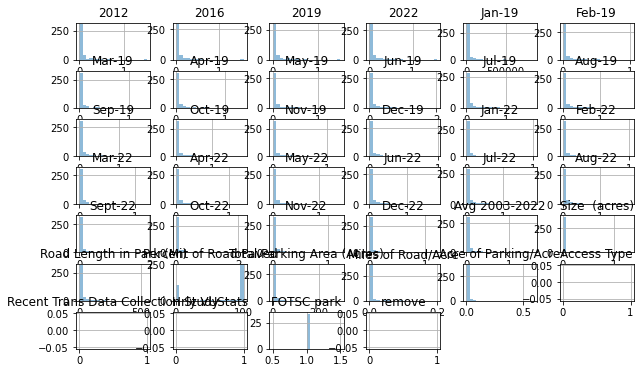

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count
No handles with labels found to put in legend.


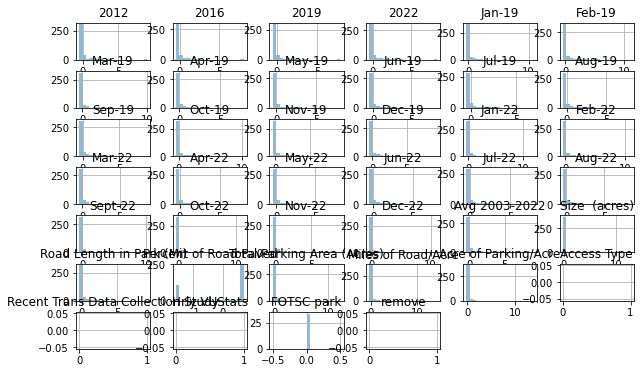

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

numerical_cols=df.select_dtypes(include=['float64','int64']).columns

df[numerical_cols].hist(alpha=0.5,bins=20, figsize=(10,6), label='Before Normalization')
plt.title('Histograms Before Normalization')
plt.legend()
plt.show()

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols].values)

df[numerical_cols].hist(alpha=0.5, bins=20, figsize=(10,6), label='After Normalization')
plt.title('Histogram After Normalization')
plt.legend()
plt.show()

In [11]:
from sklearn import datasets    
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

numerical_cols=df.select_dtypes(include=['float64','int64']).columns
string_cols = df.select_dtypes(include=['object']).columns

scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1050: RuntimeWarning: invalid value encountered in true_divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1055: RuntimeWarning: invalid value encountered in true_divide
  T = new_sum / new_sample_count
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\extmath.py:1075: RuntimeWarning: invalid value encountered in true_divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [12]:
kmeans = KMeans(
    init="random",
     n_clusters=10,
     n_init='auto',
     max_iter=300,
     random_state=42
)


In [13]:
one_hot = pd.get_dummies(df['Setting'])
df = df.drop('Setting',axis = 1)
# Join the encoded df
df = df.join(one_hot)

one_hot = pd.get_dummies(df['visitation patterns '])
df = df.drop('visitation patterns ',axis = 1)
# Join the encoded df
df = df.join(one_hot)

In [14]:
df = df.loc[df['remove']!="Yes"]

In [15]:
kmeans.fit(df[['2012','2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Road Length in Park (Mi)',
       'Percent of Road Paved', 'Total Parking Area (Acres)',
       'Miles of Road/Acre', 'Acre of Parking/Acre','rural', 'suburban', 'urban', '1. Sporadic',
       '2. Seasonal', '3. Sustained', '4. Unclear']])

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


KMeans(init='random', n_clusters=10, n_init='auto', random_state=42)

In [16]:
df.head()

,NPS Full Name,Simplified Name,Park Alpha,2012,2016,2019,2022,Jan-19,Feb-19,Mar-19,...,FOTSC park,remove,rural,suburban,urban,1. Sporadic,2. Seasonal,3. Sustained,4. Unclear,Not in Database
0,Abraham Lincoln Birthplace National Historical...,Abraham Lincoln Birthplace,ABLI,-0.351710,-0.329510,-0.336950,-0.304293,-0.325153,-0.315281,-0.312518,...,NaN,NaN,1,0,0,0,0,0,0,0
1,Acadia National Park,Acadia,ACAD,1.070530,1.344529,1.442126,1.789523,-0.239070,-0.285306,-0.269470,...,0.0,NaN,1,0,0,0,1,0,0,0
2,Adams National Historical Park,Adams,ADAM,-0.246991,-0.358698,-0.365215,-0.447209,-0.350118,-0.387986,-0.422642,...,NaN,NaN,0,0,1,0,0,0,0,0
3,African Burial Ground National Monument,African Burial Ground,AFBG,-0.409499,-0.442526,-0.443058,-0.437660,-0.349217,-0.372061,-0.413855,...,NaN,NaN,0,0,1,0,0,0,0,0
4,Agate Fossil Beds National Monument,Agate Fossil Beds,AGFO,-0.450879,-0.459520,-0.460170,-0.445226,-0.350470,-0.388959,-0.421503,...,NaN,NaN,1,0,0,0,0,0,0,0


In [17]:
kmeans.labels_[:5]

array([7, 9, 1, 1, 7])

In [18]:
kmeans_kwargs = {
       "init": "random",
       "n_init": 10,
       "max_iter": 300,
     "random_state": 42,
   }
   
# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(df[['2012','2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Road Length in Park (Mi)',
       'Percent of Road Paved', 'Total Parking Area (Acres)',
       'Miles of Road/Acre', 'Acre of Parking/Acre', 'rural', 'suburban', 'urban', '1. Sporadic',
       '2. Seasonal', '3. Sustained', '4. Unclear']])
    sse.append(kmeans.inertia_)

C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\Python39\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
C:\Users\Jonathan.Robison\AppData\Roaming\Python\

In [19]:
sse

[13955.670103092785,
 7803.158024366375,
 5297.553017524522,
 4609.2156062066915,
 4248.793618172839,
 3975.3845679540536,
 3600.7653752605092,
 3473.7766251235053,
 3253.1578525788746,
 3050.8485509089164]

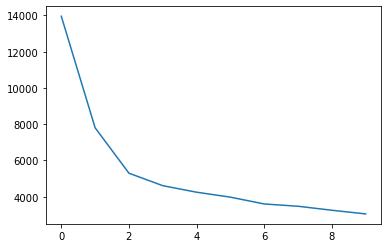

In [20]:
plt.plot(sse)

In [ ]:
kmeans = KMeans(
    init="random",
     n_clusters=5,
     n_init=10,
     max_iter=300,
     random_state=42
)
kmeans.fit(df[['2012','2016', '2019', '2022', 'Jan-19', 'Feb-19', 'Mar-19', 'Apr-19',
       'May-19', 'Jun-19', 'Jul-19', 'Aug-19', 'Sep-19', 'Oct-19', 'Nov-19',
       'Dec-19', 'Jan-22', 'Feb-22', 'Mar-22', 'Apr-22', 'May-22', 'Jun-22',
       'Jul-22', 'Aug-22', 'Sept-22', 'Oct-22', 'Nov-22', 'Dec-22',
       'Avg 2003-2022', 'Size  (acres)', 'Road Length in Park (Mi)',
       'Percent of Road Paved', 'Total Parking Area (Acres)',
       'Miles of Road/Acre', 'Acre of Parking/Acre', 'rural', 'suburban', 'urban', '1. Sporadic',
       '2. Seasonal', '3. Sustained', '4. Unclear']])

In [ ]:
plt.hist(kmeans.labels_)
plt.title("Histogram of K-Means Clusters")
plt.xlabel("")
plt.ylabel("Number of Parks")
plt.show()

In [ ]:
df['cluster'] = kmeans.labels_

In [ ]:
df.head()

In [ ]:
df.to_excel(r"C:\Users\Jonathan.Robison\DOT OST\volpe-proj-VU16A100 - Emerging Mobility\Subgroup Support\Traveler Information Technologies\Enhancing Trip Planning Information\NPS Park cluster result 11_21.xlsx")

In [ ]:
df = df.sort_values(by=['cluster']).reset_index()

In [ ]:
print(len(df.loc[df['cluster']==0]), " in cluster 0")
df.loc[df['cluster']==0]

In [ ]:
print(len(df.loc[df['cluster']==1]), " in cluster 1")
df.loc[df['cluster']==1]

In [ ]:
print(len(df.loc[df['cluster']==2]), " in cluster 2")
df.loc[df['cluster']==2]

In [ ]:
print(len(df.loc[df['cluster']==3]), " in cluster 3")
df.loc[df['cluster']==3]

In [ ]:
print(len(df.loc[df['cluster']==4]), " in cluster 4")
df.loc[df['cluster']==4]

In [ ]:
print(len(df.loc[df['cluster']==5]), " in cluster 5")
df.loc[df['cluster']==5]

In [ ]:
print(len(df.loc[df['cluster']==6]), " in cluster 6")
df.loc[df['cluster']==6]

In [ ]:
print(len(df.loc[df['cluster']==7]), " in cluster 7")
df.loc[df['cluster']==7]